In [1926]:
from xgboost import XGBRegressor as xgbr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import time

In [1927]:
df = pd.read_csv('cocoa_ratings_clean.csv')

In [1928]:
df.head()

,Unnamed: 0,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,892,kallari (ecuatoriana),diego/ original micro,248,2008,85.0,ecuador,2.50,unknown,ecuador
1,1699,valrhona,guanaja,63,2006,70.0,france,4.00,"criollo, trinitario",south america
2,954,l'amourette,rugoso,1784,2016,80.0,u.s.a.,3.50,trinitario,nicaragua
3,29,aequare (gianduja),"los rios, quevedo, arriba",370,2009,55.0,ecuador,2.75,forastero (arriba),ecuador
4,533,devries,costa rica,166,2007,77.0,u.s.a.,3.50,trinitario,costa rica


In [1929]:
def encode_values(df, column):
    final_vals = []
    registered_vals = {}
    for i, val in enumerate(df[column]):
        if not val in list(registered_vals.keys()):
            registered_vals[val] = i
        final_vals.append(registered_vals[val])
    return final_vals

In [1930]:
df_validation_values = df.iloc[0:100, :]
df_validation_values.to_csv('validation_values.csv', index=False)

In [1931]:
categorical_cols = ['maker', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']

In [1932]:
encoded_cols = np.array([encode_values(df, col) for col in categorical_cols])

In [1933]:
df['maker'] = encoded_cols[0]
df['specific_origin'] = encoded_cols[1]
df['company_location'] = encoded_cols[2]
df['bean_type'] = encoded_cols[3]
df['broad_origin'] = encoded_cols[4]

In [1934]:
df_validation = df.iloc[0:100, :]
df = df.iloc[100:,:]#df[df[(df['rating'] >= 4) & (df['rating'] <= 5)]]
df_validation.to_csv('validation_set.csv', index=False)

In [1935]:
df = df[(df['rating'] >= 2) & (df['rating'] <= 5)]

In [1936]:
df.head()

,Unnamed: 0,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
100,234,65,100,761,2011,75.0,1,3.25,2,57
101,626,101,101,903,2012,70.0,2,2.75,2,17
102,1161,102,102,1049,2013,70.0,102,3.00,0,4
103,548,103,103,1688,2015,85.0,16,3.00,0,17
104,1193,104,104,1454,2015,70.0,2,3.75,60,104


In [1937]:
df['ratio'] = df['ref'] / df['cocoa_percent'] 

In [1938]:
df = df.drop(['Unnamed: 0'], axis=1)#, 'maker', 'specific_origin', 'company_location', 'bean_type', 'broad_origin'], axis=1)

In [1940]:
df.head()
df_sample = df.copy()

In [1944]:
df_sample.head()
df_sample.reset_index().head()

,index,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin,ratio
0,100,65,100,761,2011,75.0,1,3.25,2,57,10.146667
1,101,101,101,903,2012,70.0,2,2.75,2,17,12.900000
2,102,102,102,1049,2013,70.0,102,3.00,0,4,14.985714
3,103,103,103,1688,2015,85.0,16,3.00,0,17,19.858824
4,104,104,104,1454,2015,70.0,2,3.75,60,104,20.771429


In [1904]:
# ingenieria de caracteristicas
df['rating'] = df['rating'].apply(lambda x : str(x))

In [1905]:
ratings = df['rating']
ratio = df['ratio']
#df = df.iloc[:, :3]
df['rating'] = ratings
df['ratio'] = ratio

df.head()

,maker,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin,ratio
100,65,100,761,2011,75.0,1,3.25,2,57,10.146667
101,101,101,903,2012,70.0,2,2.75,2,17,12.900000
102,102,102,1049,2013,70.0,102,3.0,0,4,14.985714
103,103,103,1688,2015,85.0,16,3.0,0,17,19.858824
104,104,104,1454,2015,70.0,2,3.75,60,104,20.771429


In [1906]:
Y = df['rating']
X = df.drop('rating', axis=1)

In [1907]:
Y = Y.apply(lambda x : float(x))

In [1908]:
# use 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [1918]:
reg_model = RandomForestRegressor(500, n_jobs=-1, random_state=42, max_features=None, max_depth=None)
#reg_model = xgbr(n_estimators=500, max_depth=5, subsample=0.8, nthread=-1, learning_rate=0.1)
#dt = DecisionTreeRegressor(max_depth=None)
#reg_model = AdaBoostRegressor(base_estimator=dt, n_estimators=500, random_state=24)
#reg_model = GradientBoostingRegressor(n_estimators=500)
#reg_model = LinearRegression()
#reg_model = LogisticRegression()

In [1919]:
reg_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [1920]:
# get predictions for evaluation
start_time = time.time()
predictions_train = reg_model.predict(X_train) 
predictions_test = reg_model.predict(X_test)
train_sec = time.time() - start_time
print("Took {0:0.2f} seconds or {1:0.2f} minutes to make predictions on both sets.".format(train_sec, train_sec/60))

Took 0.31 seconds or 0.01 minutes to make predictions on both sets.


In [1956]:
print('TRAIN')
print("RMSE: {0:0.5f}".format(np.sqrt(mean_squared_error(predictions_train, Y_train)))) # RMSE (Root Mean Square Error)
print("R^2: {0:0.2f}".format(reg_model.score(X_train, Y_train))) # r^2

TRAIN
RMSE: 0.15025
R^2: 0.89


In [1958]:
print('TEST')
print("MSE: {0:0.5f}".format(np.sqrt(mean_squared_error(predictions_test, Y_test)))) # RMSE (Root Mean Square Error)
print("R^2: {0:0.2f}".format(reg_model.score(X_test, Y_test))) # r^2

TEST
MSE: 0.40512
R^2: 0.15


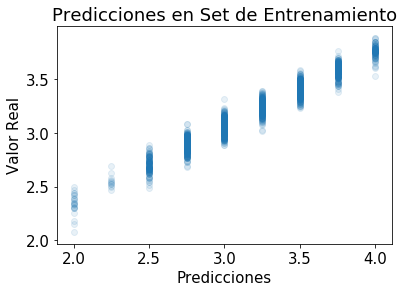

In [1950]:
# make some visualizations of the results on train
%matplotlib inline
#plt.ylim(ymax=60); plt.ylim(ymin=-5)
#plt.xlim(xmax=60); plt.xlim(xmin=-5)
plt.rcParams.update({'font.size' : 15})
plt.title('Predicciones en Set de Entrenamiento')
plt.xlabel('Predicciones')
plt.ylabel('Valor Real')
plt.scatter(Y_train.values, predictions_train, alpha=0.1)
plt.show()

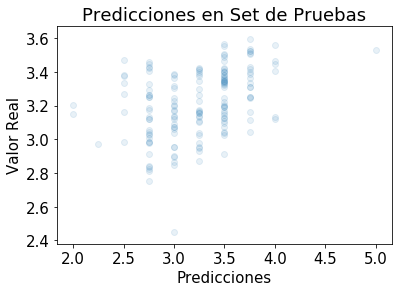

In [1953]:
# and on test
%matplotlib inline
#plt.ylim(ymax=60); plt.ylim(ymin=-5)
#plt.xlim(xmax=60); plt.xlim(xmin=-5)
plt.rcParams.update({'font.size' : 15})
plt.title('Predicciones en Set de Pruebas')
plt.xlabel('Predicciones')
plt.ylabel('Valor Real')
plt.scatter(Y_test.values, predictions_test, alpha=0.1)
plt.show()

In [1925]:
reg_model.feature_importances_


array([ 0.18289566,  0.16095044,  0.12295637,  0.02479244,  0.12474981,
        0.07475677,  0.05877493,  0.11449501,  0.13562856])

In [1916]:
"""
# se obtuvieron despues de experimentar con el algoritmo RandomForestClassifier
reg_model.feature_importances_
array([ 0.15636299,  0.18863246,  0.12661915,  0.02519107,  0.09489883,
        0.0794574 ,  0.06144025,  0.12164413,  0.14575373])
""";

In [1917]:
pickle.dump(reg_model, open("xgbr.pickle", "wb"))